**Prepare and Clean the data. Take 1000 data sample from the dataset for analysis. udemy_courses.csv**

Perform exploratory data analysis and answer these questions :

Which are top selling courses?

Show all the courses which are free?

Which subject has the maximum number of courses?

List out all the courses that are related to 'Java’

In [1]:
!pip install plotly==4.8.2

     |████████████████████████████████| 11.5MB 10.1MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import difflib
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("/content/udemy_courses.csv")
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_id       3678 non-null   int64  
 1   course_title    3678 non-null   object 
 2   url             3678 non-null   object 
 3   paid            3678 non-null   bool   
 4   price           3678 non-null   int64  
 5   subscribers     3678 non-null   int64  
 6   reviews         3678 non-null   int64  
 7   lectures        3678 non-null   int64  
 8   level           3678 non-null   object 
 9   duration        3678 non-null   float64
 10  published_time  3678 non-null   object 
 11  subject         3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


,course_id,course_title,url,paid,price,subscribers,reviews,lectures,level,duration,published_time,subject
count,3.678000e+03,3678,3678,3678,3678.000000,3678.000000,3678.000000,3678.000000,3678,3678.000000,3678,3678
unique,NaN,3663,3672,2,NaN,NaN,NaN,NaN,4,NaN,3672,4
top,NaN,Acoustic Blues Guitar Lessons,https://www.udemy.com/introduction-to-forex-tr...,True,NaN,NaN,NaN,NaN,All Levels,NaN,2017-04-23T16:19:01Z,Web Development
freq,NaN,3,2,3368,NaN,NaN,NaN,NaN,1929,NaN,2,1200
mean,6.759720e+05,NaN,NaN,NaN,66.049483,3197.150625,156.259108,40.108755,NaN,4.094517,NaN,NaN
std,3.432732e+05,NaN,NaN,NaN,61.005755,9504.117010,935.452044,50.383346,NaN,6.053840,NaN,NaN
min,8.324000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,4.076925e+05,NaN,NaN,NaN,20.000000,111.000000,4.000000,15.000000,NaN,1.000000,NaN,NaN
50%,6.879170e+05,NaN,NaN,NaN,45.000000,911.500000,18.000000,25.000000,NaN,2.000000,NaN,NaN
75%,9.613555e+05,NaN,NaN,NaN,95.000000,2546.000000,67.000000,45.750000,NaN,4.500000,NaN,NaN


In [7]:
df['price'].astype(str).str.replace(',', '')

0       200
1        75
2        45
3        95
4       200
       ... 
3673    100
3674     25
3675     40
3676     50
3677     45
Name: price, Length: 3678, dtype: object

In [8]:
dff = df.drop(columns=['course_id','published_time','url'])
dff.head(7)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   course_title  3678 non-null   object 
 1   paid          3678 non-null   bool   
 2   price         3678 non-null   int64  
 3   subscribers   3678 non-null   int64  
 4   reviews       3678 non-null   int64  
 5   lectures      3678 non-null   int64  
 6   level         3678 non-null   object 
 7   duration      3678 non-null   float64
 8   subject       3678 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 233.6+ KB


In [9]:
dff = dff.drop_duplicates(['course_title'],keep='last')
dff.shape

(3663, 9)

In [10]:
print(f"Total number of columns in givern dataset: {df.shape[0]}\nAfter removing duplicate values,number of columns in data set is: {dff.shape[0]}\nTotal number of Duplicate columns in data set:\t{df.shape[0]-dff.shape[0]}")

Total number of columns in givern dataset: 3678
After removing duplicate values,number of columns in data set is: 3663
Total number of Duplicate columns in data set:	15


In [11]:
a = dff.sample(1000)
a.head(5)

,course_title,paid,price,subscribers,reviews,lectures,level,duration,subject
3014,Professional WordPress Theme Development For 2017,True,20,3185,102,94,All Levels,8.0,Web Development
3134,Sending email with PHP: from Basic to Advanced,True,40,379,58,45,All Levels,2.0,Web Development
2854,Ruby on Rails Tutorial: Learn 6 Ruby on Rails ...,True,200,1266,16,21,All Levels,2.0,Web Development
3160,Professional Python Web Development Using Flask,True,120,3420,489,102,Beginner Level,14.5,Web Development
1225,How To Make Professional eBook Covers For FREE,True,20,1080,6,35,All Levels,3.0,Graphic Design


In [14]:
a.to_csv("udemy_courses Cleaned.csv")

**Show all the courses which are free?**

In [13]:
a[a.paid == False]
analysis_data = a.groupby(a.paid == False)
analysis_data.describe()

price                                    ...  duration                       
       count       mean        std   min   25%  ...       min    25%  50%  75%   max
paid                                            ...                                 
False  924.0  72.981602  60.261355  20.0  20.0  ...  0.133333  1.375  2.0  4.5  76.5
True    76.0   0.000000   0.000000   0.0   0.0  ...  0.533333  1.000  1.5  2.5   6.5

[2 rows x 40 columns]

In [ ]:
fc = pd.crosstab(index=a["paid"],columns="Total")
fc

col_0,Total
paid,
False,82
True,918


**Which subject has the maximum number of courses?**

In [ ]:
a.subject.value_counts()

Web Development        325
Business Finance       324
Musical Instruments    191
Graphic Design         160
Name: subject, dtype: int64

In [ ]:
analysis_data = a.groupby('subject')
analysis_data.describe()

price                             ... duration                  
                     count       mean        std  min  ...      25%  50%    75%   max
subject                                                ...                           
Business Finance     326.0  72.714724  64.690327  0.0  ...      1.0  2.0  3.875  45.0
Graphic Design       166.0  59.638554  57.002303  0.0  ...      1.0  2.0  3.500  78.5
Musical Instruments  186.0  44.731183  34.546213  0.0  ...      1.0  2.0  3.000  18.5
Web Development      322.0  77.701863  67.633550  0.0  ...      1.5  3.5  6.500  66.5

[4 rows x 40 columns]

In [ ]:
fig = px.bar(a,
             x='subject',
             y='subscribers',
             color='subject',
             orientation='v',
             barmode="overlay",
             title="Long-Form Input")
fig.show()

**List out all the courses that are related to 'Java™'**

In [ ]:
searchfor = ['java', 'Java','Jquery','JQuery','jquery']
a[a.course_title.str.contains('|'.join(searchfor))]

,course_title,paid,price,subscribers,reviews,lectures,level,duration,subject
3641,JavaScript from Scratch for Very Beginners,True,30,1272,31,29,Beginner Level,5.000000,Web Development
3458,Create a social network using PHP Mysqli HTML ...,True,40,1477,17,27,Intermediate Level,6.000000,Web Development
3066,Essentials of JavaScript Practice Coding Exerc...,True,80,28125,115,21,Beginner Level,2.000000,Web Development
3327,"JSON with Java APIs, jQuery and JSON REST Web ...",True,95,799,87,41,Beginner Level,6.000000,Web Development
2691,Power up HTML5 with JavaScript,True,100,4442,23,28,Beginner Level,2.000000,Web Development
3477,A Beginner's Guide to the Meteor JavaScript Fr...,True,50,898,132,40,Beginner Level,2.000000,Web Development
2632,Javascript Intermediate level 1 - Mastering th...,True,100,1838,169,31,All Levels,3.000000,Web Development
3021,VueJS V1 Introduction to VueJS JavaScript Fram...,True,200,3632,28,31,Beginner Level,2.000000,Web Development
3247,JavaScript: Understanding the Weird Parts,True,175,79612,16976,85,All Levels,11.500000,Web Development
3493,JavaScript Basics for Beginners Introduction t...,True,150,5495,52,18,Beginner Level,1.500000,Web Development


**Which are top selling courses?**

In [ ]:
subject = a['subject']
level = a['level']
paid = a['paid']
subs = a['subscribers']
fig = px.sunburst(a,
                 path=['subject','level','paid'],
                  values = subs,
                  title = "Complete overview")
fig.show(renderer="colab")

In [ ]:
heat_mapp = a.copy()
heat_mapp['price'] = heat_mapp['price'].astype('int')
heat_mapp['paid'] = heat_mapp['paid'].astype('int')

In [ ]:
heat_mapp['subject'] = a['subject'].replace(['Musical Instruments', 'Web Development', 'Business Finance', 'Graphic Design'],[0,1,2,3])
heat_mapp['level'] = a['level'].replace(['All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level'],[0,1,2,3])

In [ ]:
drop_rank = heat_mapp.drop("subscribers", axis = 1)
heat_mapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2954 to 1633
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   paid         1000 non-null   int64
 1   price        1000 non-null   int64
 2   subscribers  1000 non-null   int64
 3   reviews      1000 non-null   int64
 4   lectures     1000 non-null   int64
 5   level        1000 non-null   int64
 6   subject      1000 non-null   int64
dtypes: int64(7)
memory usage: 62.5 KB


In [ ]:
corr_matrix_happy = drop_rank.corr()
trace_corr_price = go.Heatmap(z=np.array(corr_matrix_happy),
                             x = corr_matrix_happy.columns,
                             y= corr_matrix_happy.columns)
data_effect = [trace_corr_price]
iplot(data_effect)

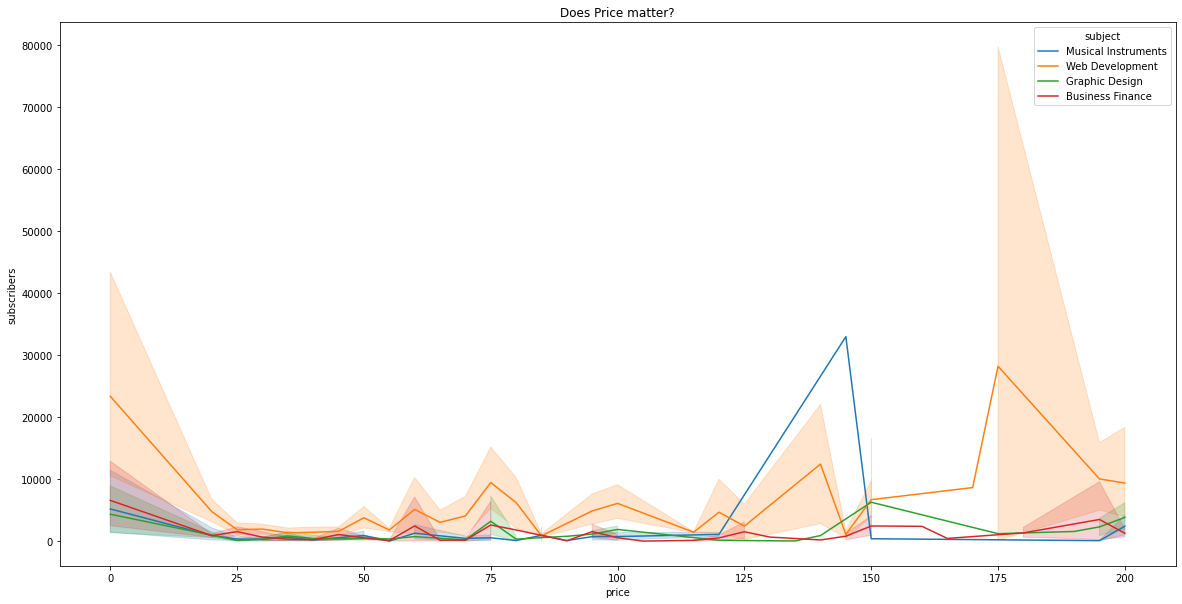

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Does Price matter?")
a['price'] = a['price'].astype('int')
sns.lineplot(data=a,x='price',y='subscribers',hue='subject')
plt.show()

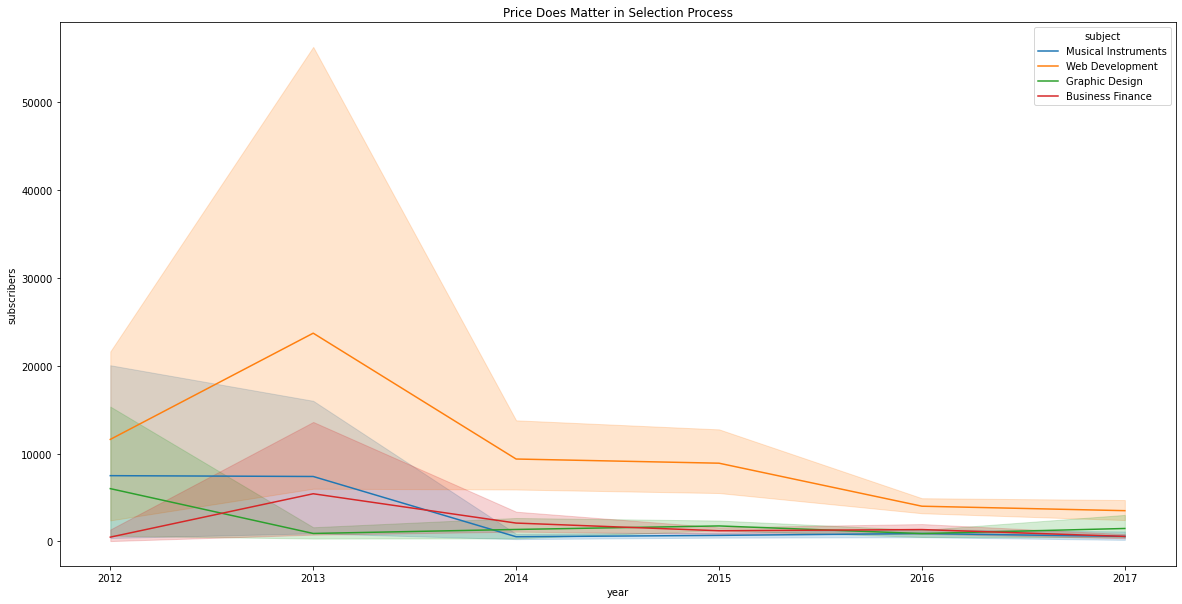

In [ ]:
plt.figure(figsize=(20,10))
df1 = a.copy()
df1['published_time'] = pd.to_datetime(df['published_time'])
df1["year"] = df1['published_time'].dt.year
plt.title("Price Does Matter in Selection Process")
sns.lineplot(data=df1,y='subscribers',x='year',hue='subject')
plt.show()

In [ ]:
train = df1.sort_values(by='subscribers', ascending=False)[:10]
fig = px.bar(df1,
             y = train['course_title'],
             x = train['subscribers'],
             color = train['subject'],
             orientation='h',
             barmode="overlay",
             title="Top Courses by Number of Subscribers")
fig.show()

In [ ]:
train = df1.sort_values(by='reviews', ascending=False)[:30]
fig = px.bar(df,
             y = train['course_title'],
             x = train['reviews'],
             color = train['subject'],
             orientation='h',
             barmode="relative",
             title="Top Courses by Reviews")
fig.show()